# Install the `datasets` library

In [24]:
# Install the datasets library
!pip install datasets

# Import necessary libraries

In [25]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Load the churn prediction dataset from scikit-learn

In [26]:
# Load the churn prediction dataset from the scikit-learn collection in the datasets library
from datasets import load_dataset

ds = load_dataset("scikit-learn/churn-prediction")

# Convert the dataset to a pandas DataFrame

In [27]:
# Convert the 'train' split of the dataset to a pandas DataFrame
df = ds['train'].to_pandas()

# Display the first 5 rows of the DataFrame

In [28]:
# Display the first 5 rows of the DataFrame to get a glimpse of the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Get information about the DataFrame, including data types and non-null counts

In [29]:
# Print a concise summary of the DataFrame, showing column names, non-null counts, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Generate descriptive statistics for the numerical columns

In [30]:
# Generate descriptive statistics for numerical columns in the DataFrame
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Print unique values for each column

In [31]:
# Iterate through each column and print the column name and its unique values
columns=df.columns
for i in columns:
  print(i)
  print(df[i].unique())
  print("-"*34)

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------
gender
['Female' 'Male']
----------------------------------
SeniorCitizen
[0 1]
----------------------------------
Partner
['Yes' 'No']
----------------------------------
Dependents
['No' 'Yes']
----------------------------------
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
----------------------------------
PhoneService
['No' 'Yes']
----------------------------------
MultipleLines
['No phone service' 'No' 'Yes']
----------------------------------
InternetService
['DSL' 'Fiber optic' 'No']
----------------------------------
OnlineSecurity
['No' 'Yes' 'No internet service']
----------------------------------
OnlineBackup
['Yes' 'No' 'No internet service']
--------------------

# Check for missing values in each column

In [32]:
# Calculate and display the sum of missing values for each column
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# Generate descriptive statistics for object (categorical) columns

In [33]:
# Generate descriptive statistics for columns with object data type
df.describe(include=['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


# Visualize the distribution of 'tenure' and 'MonthlyCharges'

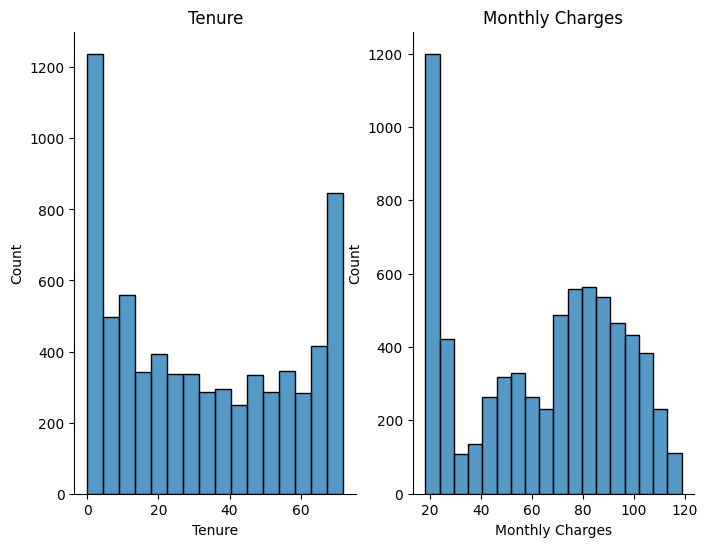

In [34]:
# Create histograms to visualize the distribution of 'tenure' and 'MonthlyCharges'
plt.style.use({
    'axes.spines.top': False,
    'axes.spines.right': False,
})
f,ax=plt.subplots(1,2,figsize=(8,6))
sns.histplot(data=df, x='tenure',ax=ax[0])
ax[0].set_title("Tenure")
ax[0].set_xlabel("Tenure")
ax[0].set_ylabel("Count")
sns.histplot(data=df, x='MonthlyCharges',ax=ax[1])
ax[1].set_title("Monthly Charges")
ax[1].set_xlabel("Monthly Charges")
ax[1].set_ylabel("Count")
plt.show()

# Visualize the distribution of 'gender' and 'SeniorCitizen' using pie charts

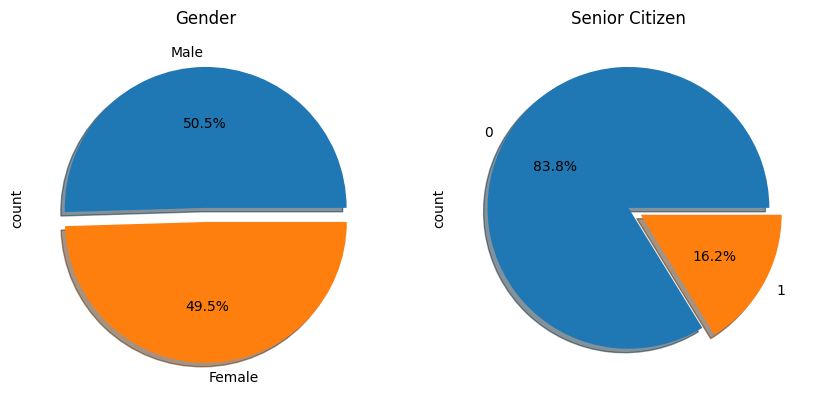

In [35]:
# Create pie charts to visualize the distribution of 'gender' and 'SeniorCitizen'
f,ax=plt.subplots(1,2,figsize=(10,10))
df["gender"].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Gender")
df["SeniorCitizen"].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1], shadow=True)
ax[1].set_title("Senior Citizen")
plt.show()

# Encode categorical columns using Label Encoding and One-Hot Encoding

In [36]:
# Define columns for label encoding and one-hot encoding
label_encoding_columns=['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']
one_hot_encoding_columns=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
# Initialize LabelEncoder and apply it to specified columns
label_encoder=LabelEncoder()
for i in label_encoding_columns:
  df[i]=label_encoder.fit_transform(df[i])
# Apply one-hot encoding to specified columns, dropping the first category to avoid multicollinearity
df = pd.get_dummies(df, columns=[
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'
],drop_first=True,sparse=True)
# Display the first 5 rows of the modified DataFrame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False


# Visualize the distribution of 'Churn' and the relationship between 'Churn' and 'gender'

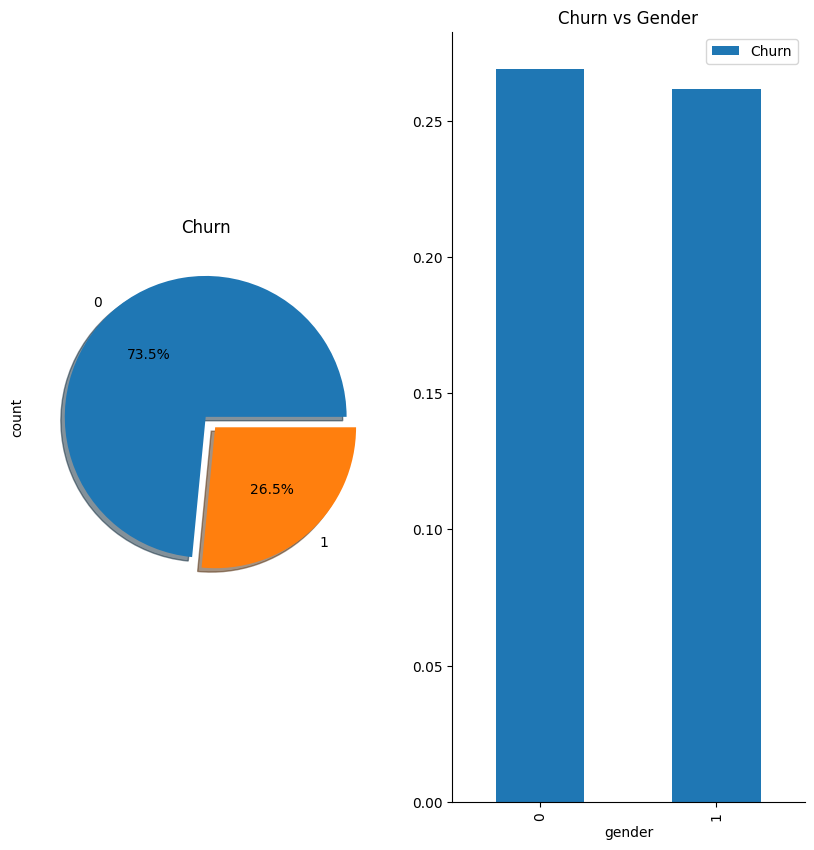

In [37]:
# Create a pie chart to visualize the distribution of the 'Churn' column
f,ax=plt.subplots(1,2,figsize=(10,10))
df['Churn'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True,ax=ax[0])
ax[0].set_title("Churn")
# Create a bar plot to show the relationship between 'Churn' and 'gender'
df[['Churn','gender']].groupby(['gender']).mean().plot.bar(ax=ax[1])
ax[1].set_title("Churn vs Gender")
plt.show()

# Display the first 5 rows of the DataFrame

In [38]:
# Display the first 5 rows of the DataFrame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False


# Visualize the correlation matrix of numerical columns

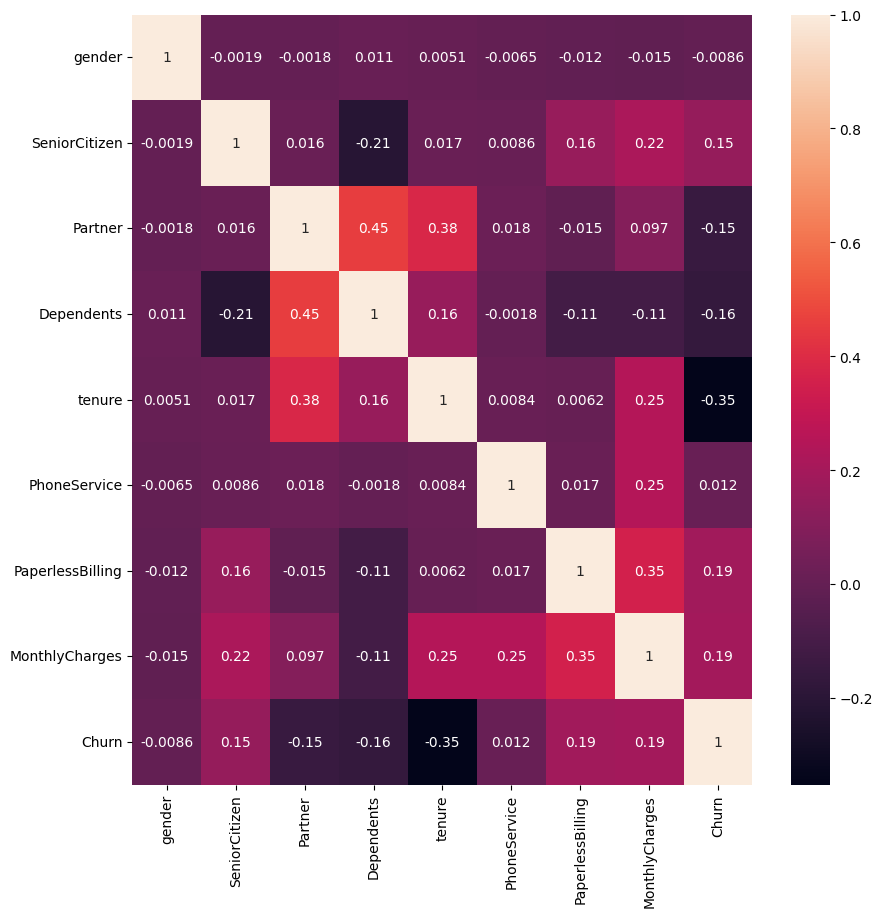

In [39]:
# Select numerical columns and calculate the correlation matrix
numarical_columns=df.select_dtypes(include=['number']).columns
correlation=df[numarical_columns].corr()
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True)
plt.show()

# Scale 'tenure' and 'MonthlyCharges' using MinMaxScaler

In [40]:
# Initialize MinMaxScaler and apply it to 'tenure' and 'MonthlyCharges' columns
scaler=MinMaxScaler()
df['tenure']=scaler.fit_transform(df[['tenure']])
df['MonthlyCharges']=scaler.fit_transform(df[['MonthlyCharges']])

# Drop the 'customerID' column

In [41]:
# Drop the 'customerID' column as it is not needed for modeling
df=df.drop('customerID',axis=1)

# Convert 'TotalCharges' to numeric, coercing errors to NaN

In [42]:
# Convert the 'TotalCharges' column to numeric, replacing any errors with NaN
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

# Impute missing values in 'TotalCharges' with the mean

In [43]:
# Initialize SimpleImputer with a mean strategy and apply it to 'TotalCharges' to fill missing values
imputer=SimpleImputer(strategy='mean')
df['TotalCharges']=imputer.fit_transform(df[['TotalCharges']])

# Split the data into training and testing sets

In [44]:
# Split the DataFrame into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn', axis=1), df['Churn'], test_size=0.2, random_state=42)

# Display the data types of the DataFrame columns

In [45]:
# Display the data types of all columns in the DataFrame
df.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,float64
PhoneService,int64
PaperlessBilling,int64
MonthlyCharges,float64
TotalCharges,float64
Churn,int64


# Train and evaluate different classification models

In [46]:
# Define a dictionary of classification models
models={
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'voting_classifer':VotingClassifier(estimators=[('dt',DecisionTreeClassifier()),('rf',RandomForestClassifier())],voting='soft')
}
# Iterate through the models, train each one, make predictions, and print the accuracy score
for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  print(list(models.keys())[i])
  print(accuracy)
  print("-"*34)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Decision Tree
0.7175301632363378
----------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Random Forest
0.7892122072391767
----------------------------------
voting_classifer
0.7111426543647977
----------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [3]:
from datasets import load_dataset

ds = load_dataset("scikit-learn/churn-prediction")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

dataset.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/7043 [00:00<?, ? examples/s]

In [4]:
df = ds['train'].to_pandas()

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
columns=df.columns
for i in columns:
  print(i)
  print(df[i].unique())
  print("-"*34)

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------
gender
['Female' 'Male']
----------------------------------
SeniorCitizen
[0 1]
----------------------------------
Partner
['Yes' 'No']
----------------------------------
Dependents
['No' 'Yes']
----------------------------------
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
----------------------------------
PhoneService
['No' 'Yes']
----------------------------------
MultipleLines
['No phone service' 'No' 'Yes']
----------------------------------
InternetService
['DSL' 'Fiber optic' 'No']
----------------------------------
OnlineSecurity
['No' 'Yes' 'No internet service']
----------------------------------
OnlineBackup
['Yes' 'No' 'No internet service']
--------------------

In [9]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [10]:
df.describe(include=['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


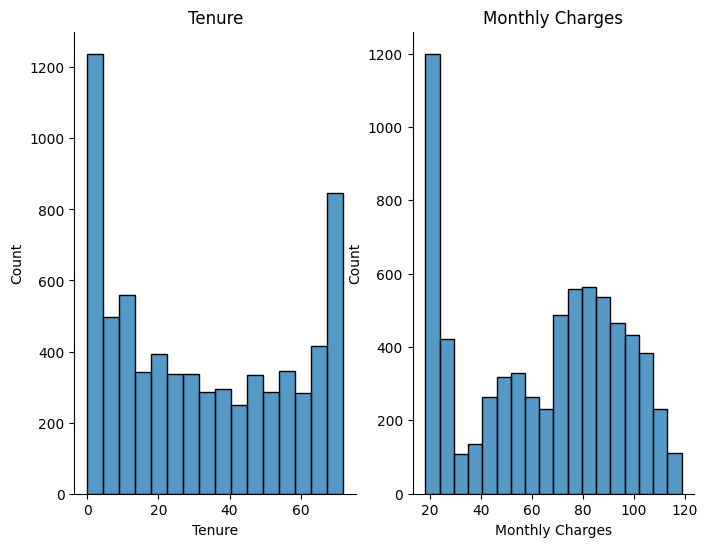

In [11]:
plt.style.use({
    'axes.spines.top': False,
    'axes.spines.right': False,
})
f,ax=plt.subplots(1,2,figsize=(8,6))
sns.histplot(data=df, x='tenure',ax=ax[0])
ax[0].set_title("Tenure")
ax[0].set_xlabel("Tenure")
ax[0].set_ylabel("Count")
sns.histplot(data=df, x='MonthlyCharges',ax=ax[1])
ax[1].set_title("Monthly Charges")
ax[1].set_xlabel("Monthly Charges")
ax[1].set_ylabel("Count")
plt.show()

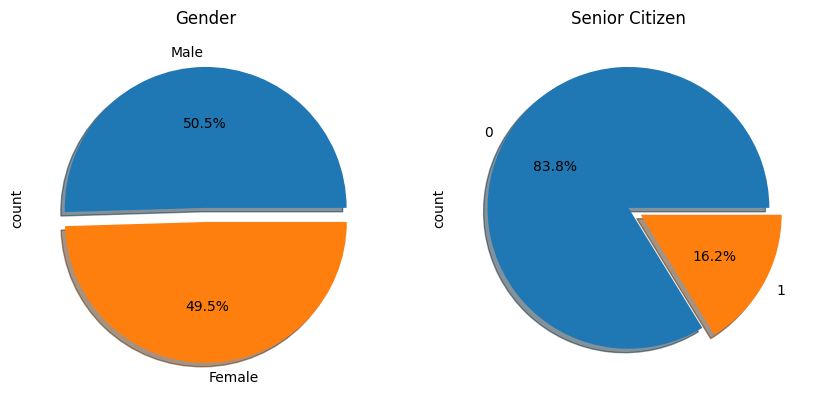

In [12]:
f,ax=plt.subplots(1,2,figsize=(10,10))
df["gender"].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Gender")
df["SeniorCitizen"].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1], shadow=True)
ax[1].set_title("Senior Citizen")
plt.show()

# Encoding the columns by one-hot encoding and label encoding

In [13]:
label_encoding_columns=['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']
one_hot_encoding_columns=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
label_encoder=LabelEncoder()
for i in label_encoding_columns:
  df[i]=label_encoder.fit_transform(df[i])
df = pd.get_dummies(df, columns=[
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'
],drop_first=True,sparse=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False


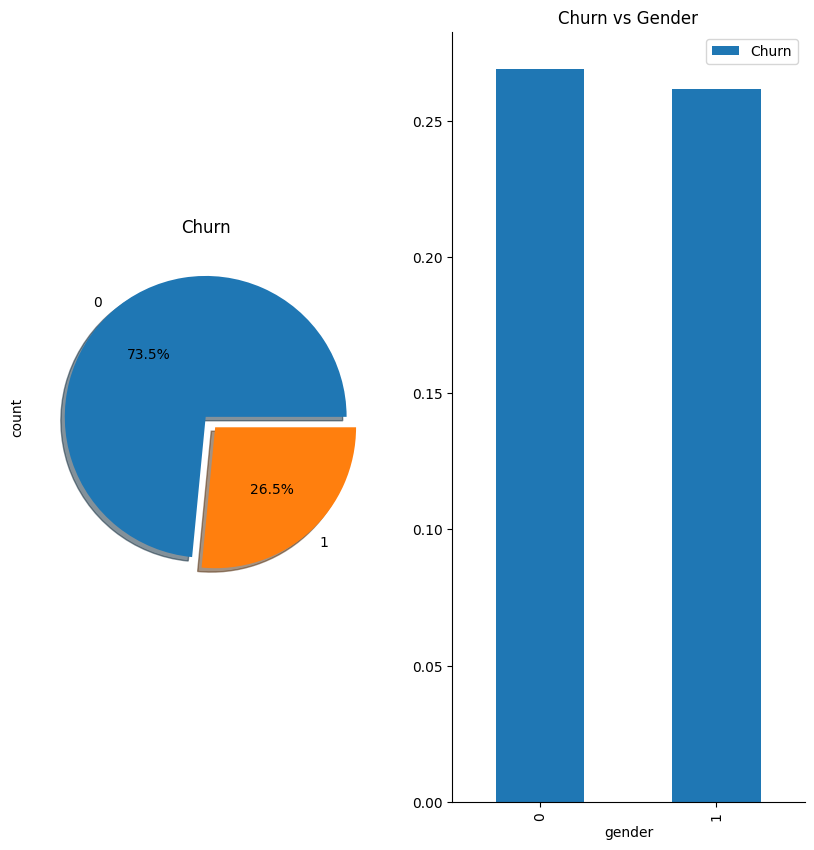

In [14]:
f,ax=plt.subplots(1,2,figsize=(10,10))
df['Churn'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True,ax=ax[0])
ax[0].set_title("Churn")
df[['Churn','gender']].groupby(['gender']).mean().plot.bar(ax=ax[1])
ax[1].set_title("Churn vs Gender")
plt.show()

In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False


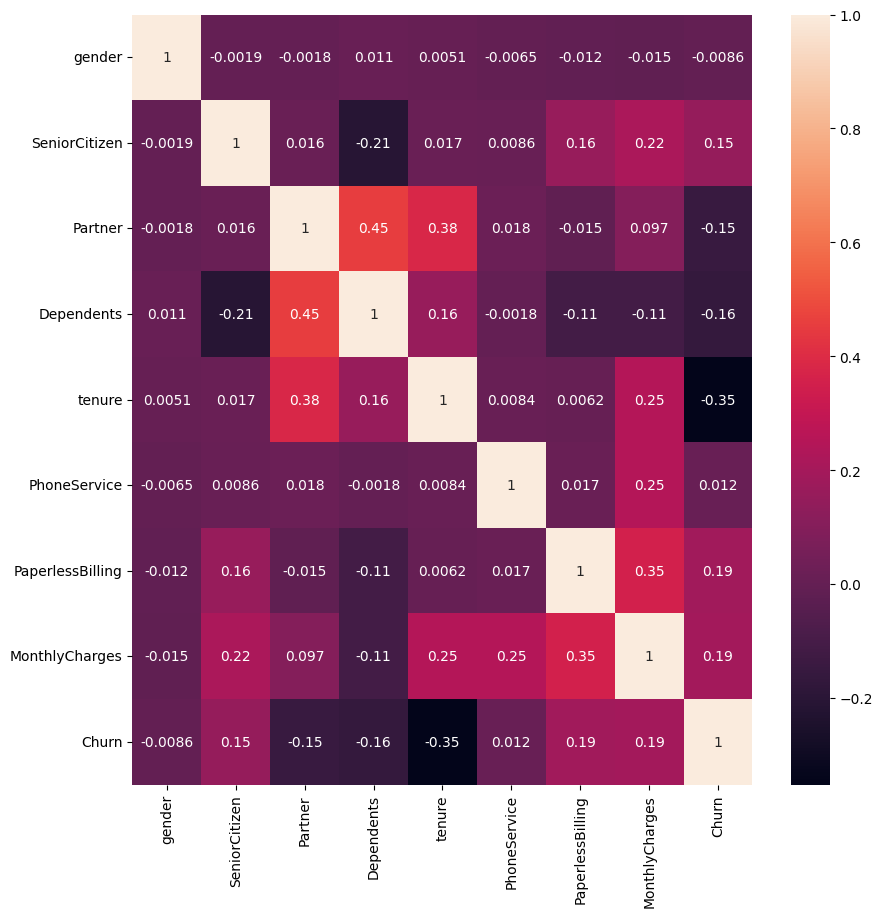

In [16]:
numarical_columns=df.select_dtypes(include=['number']).columns
correlation=df[numarical_columns].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True)
plt.show()

In [17]:
scaler=MinMaxScaler()
df['tenure']=scaler.fit_transform(df[['tenure']])
df['MonthlyCharges']=scaler.fit_transform(df[['MonthlyCharges']])

In [18]:
df=df.drop('customerID',axis=1)

In [19]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [20]:
imputer=SimpleImputer(strategy='mean')
df['TotalCharges']=imputer.fit_transform(df[['TotalCharges']])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn', axis=1), df['Churn'], test_size=0.2, random_state=42)

In [22]:
df.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,float64
PhoneService,int64
PaperlessBilling,int64
MonthlyCharges,float64
TotalCharges,float64
Churn,int64


In [23]:
models={
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'voting_classifer':VotingClassifier(estimators=[('dt',DecisionTreeClassifier()),('rf',RandomForestClassifier())],voting='soft')
}
for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  print(list(models.keys())[i])
  print(accuracy)
  print("-"*34)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Decision Tree
0.71611071682044
----------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Random Forest
0.7877927608232789
----------------------------------
voting_classifer
0.7210787792760823
----------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
